In [75]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

import os

In [2]:
#Q1)1. Read the column description and ensure you understand each attribute well 
df = pd.read_csv("C:/Users/user/Downloads/Bank_Personal_Loan_Modelling.csv")
df_copy=df.copy()

df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.isna().apply(pd.value_counts)   #null value check

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
False  5000  5000        5000    5000      5000    5000   5000       5000   

       Mortgage  Personal Loan  Securities Account  CD Account  Online  \
False      5000           5000                5000        5000    5000   

       CreditCard  
False        5000

In [5]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [80]:
any(df['Experience'] < 0) #Replacing the negative values with the mean value of the column

False

In [7]:
exp_med = df.loc[:,"Experience"].median()
df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

In [8]:
any(df['Experience'] < 0)

False

In [9]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.327600    11.253035     0.0     11.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [58]:
#Q2)Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and
#mention your insights (5 points)


!pip install pandas_profiling
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

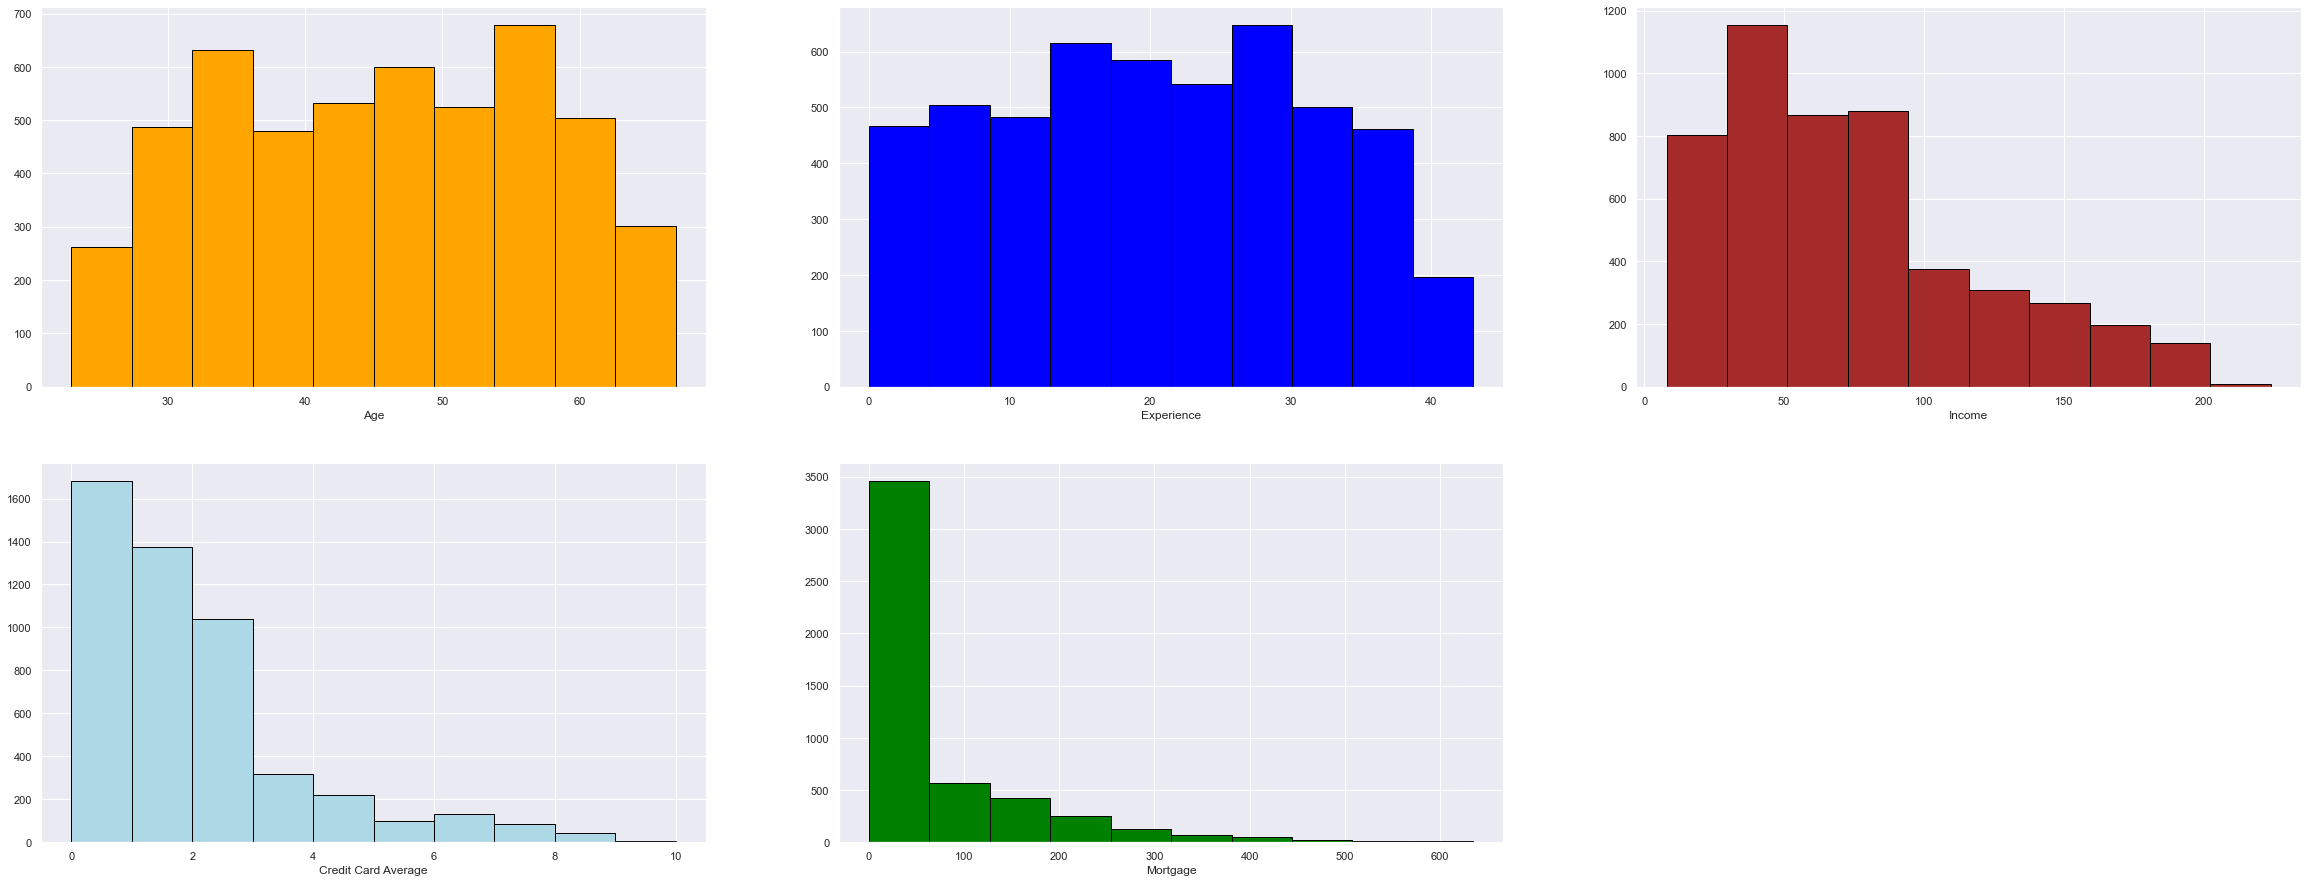

In [13]:
# Univariate Analysis of the continuous variables - 1

plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='orange', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='blue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='brown', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='lightblue', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='green', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()



# OBSERVATION: Age and experience are distributed normally but Income Mortgage and CCAvg are highly left skewed

In [12]:
# Checking for Skewness of data

import statsmodels.api as sm
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Experience),stats.skew(df.Income),stats.skew(df.CCAvg)
                                      ,stats.skew(df.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

Skewness
Age        -0.029332
Experience -0.014096
Income      0.841086
CCAvg       1.597964
Mortgage    2.103371

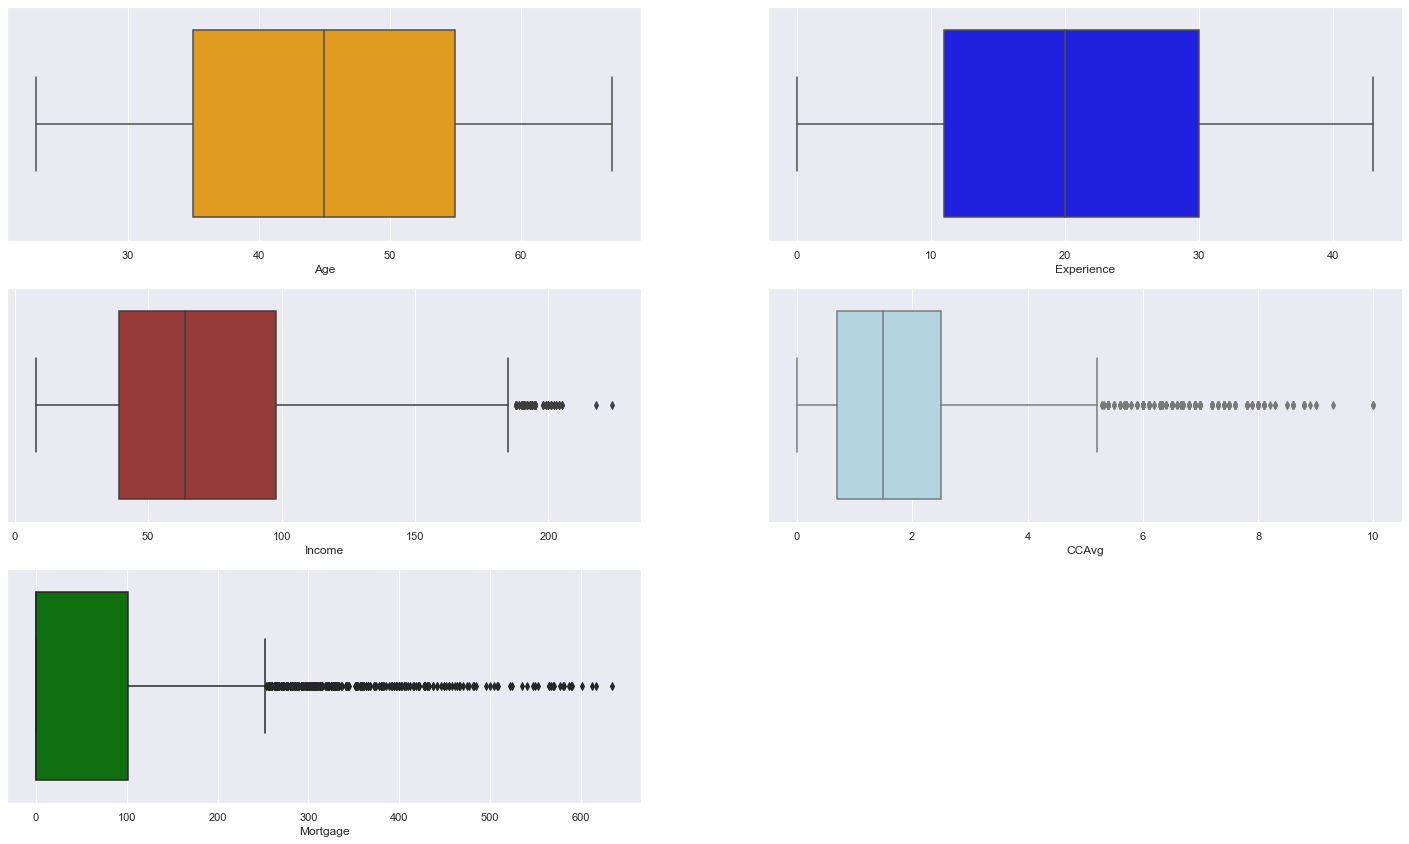

In [15]:
#Univariate Analysis of the continuous variables2

plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.Age, color='orange')

plt.subplot(5,2,2)
sns.boxplot(x= df.Experience, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.Income, color='brown')

plt.subplot(5,2,4)
sns.boxplot(x= df.CCAvg, color='lightblue')

plt.subplot(5,2,5)
sns.boxplot(x= df.Mortgage, color='green')


# OBSERVATION: Age is normalised with majority between 35 to 55 years
# Experience is also normalised  with majority between 11years to 30 yeaars
# Income is left skewed and is between 45K to 55K
# CCAvg and Mortgagae are again left skewed

Text(0.5, 1.0, 'Credit Card Distribution')

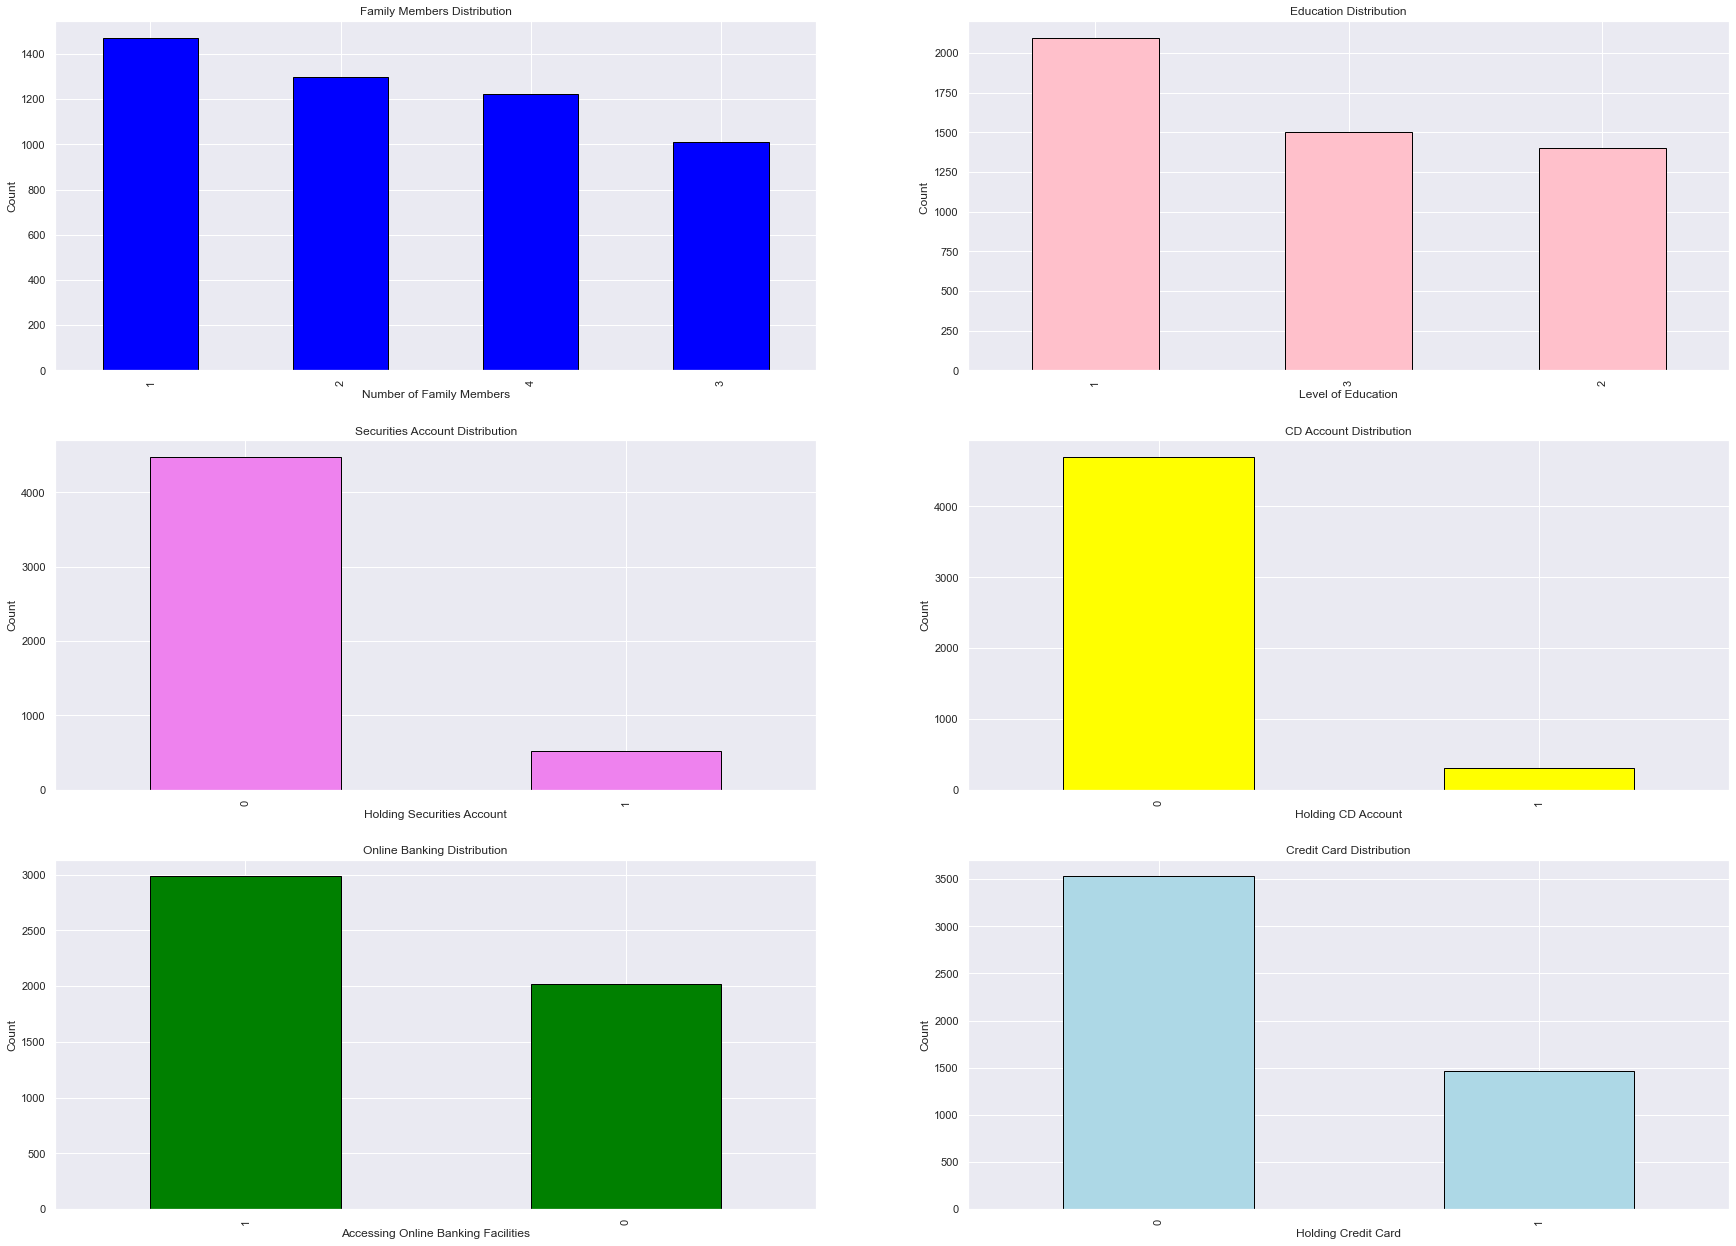

In [16]:
#Univariate Analysis of the categorical variables

plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")


#OBSERVATION: Most of them are not having security and CD account

In [17]:
#Q3)Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of
#every attribute with every other attribute (5 points)

#Checking for correlation

df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

Personal Loan       Age    Income     CCAvg  Mortgage
Personal Loan       1.000000 -0.007726  0.502462  0.366889  0.142095
Age                -0.007726  1.000000 -0.055269 -0.052012 -0.012539
Income              0.502462 -0.055269  1.000000  0.645984  0.206806
CCAvg               0.366889 -0.052012  0.645984  1.000000  0.109905
Mortgage            0.142095 -0.012539  0.206806  0.109905  1.000000

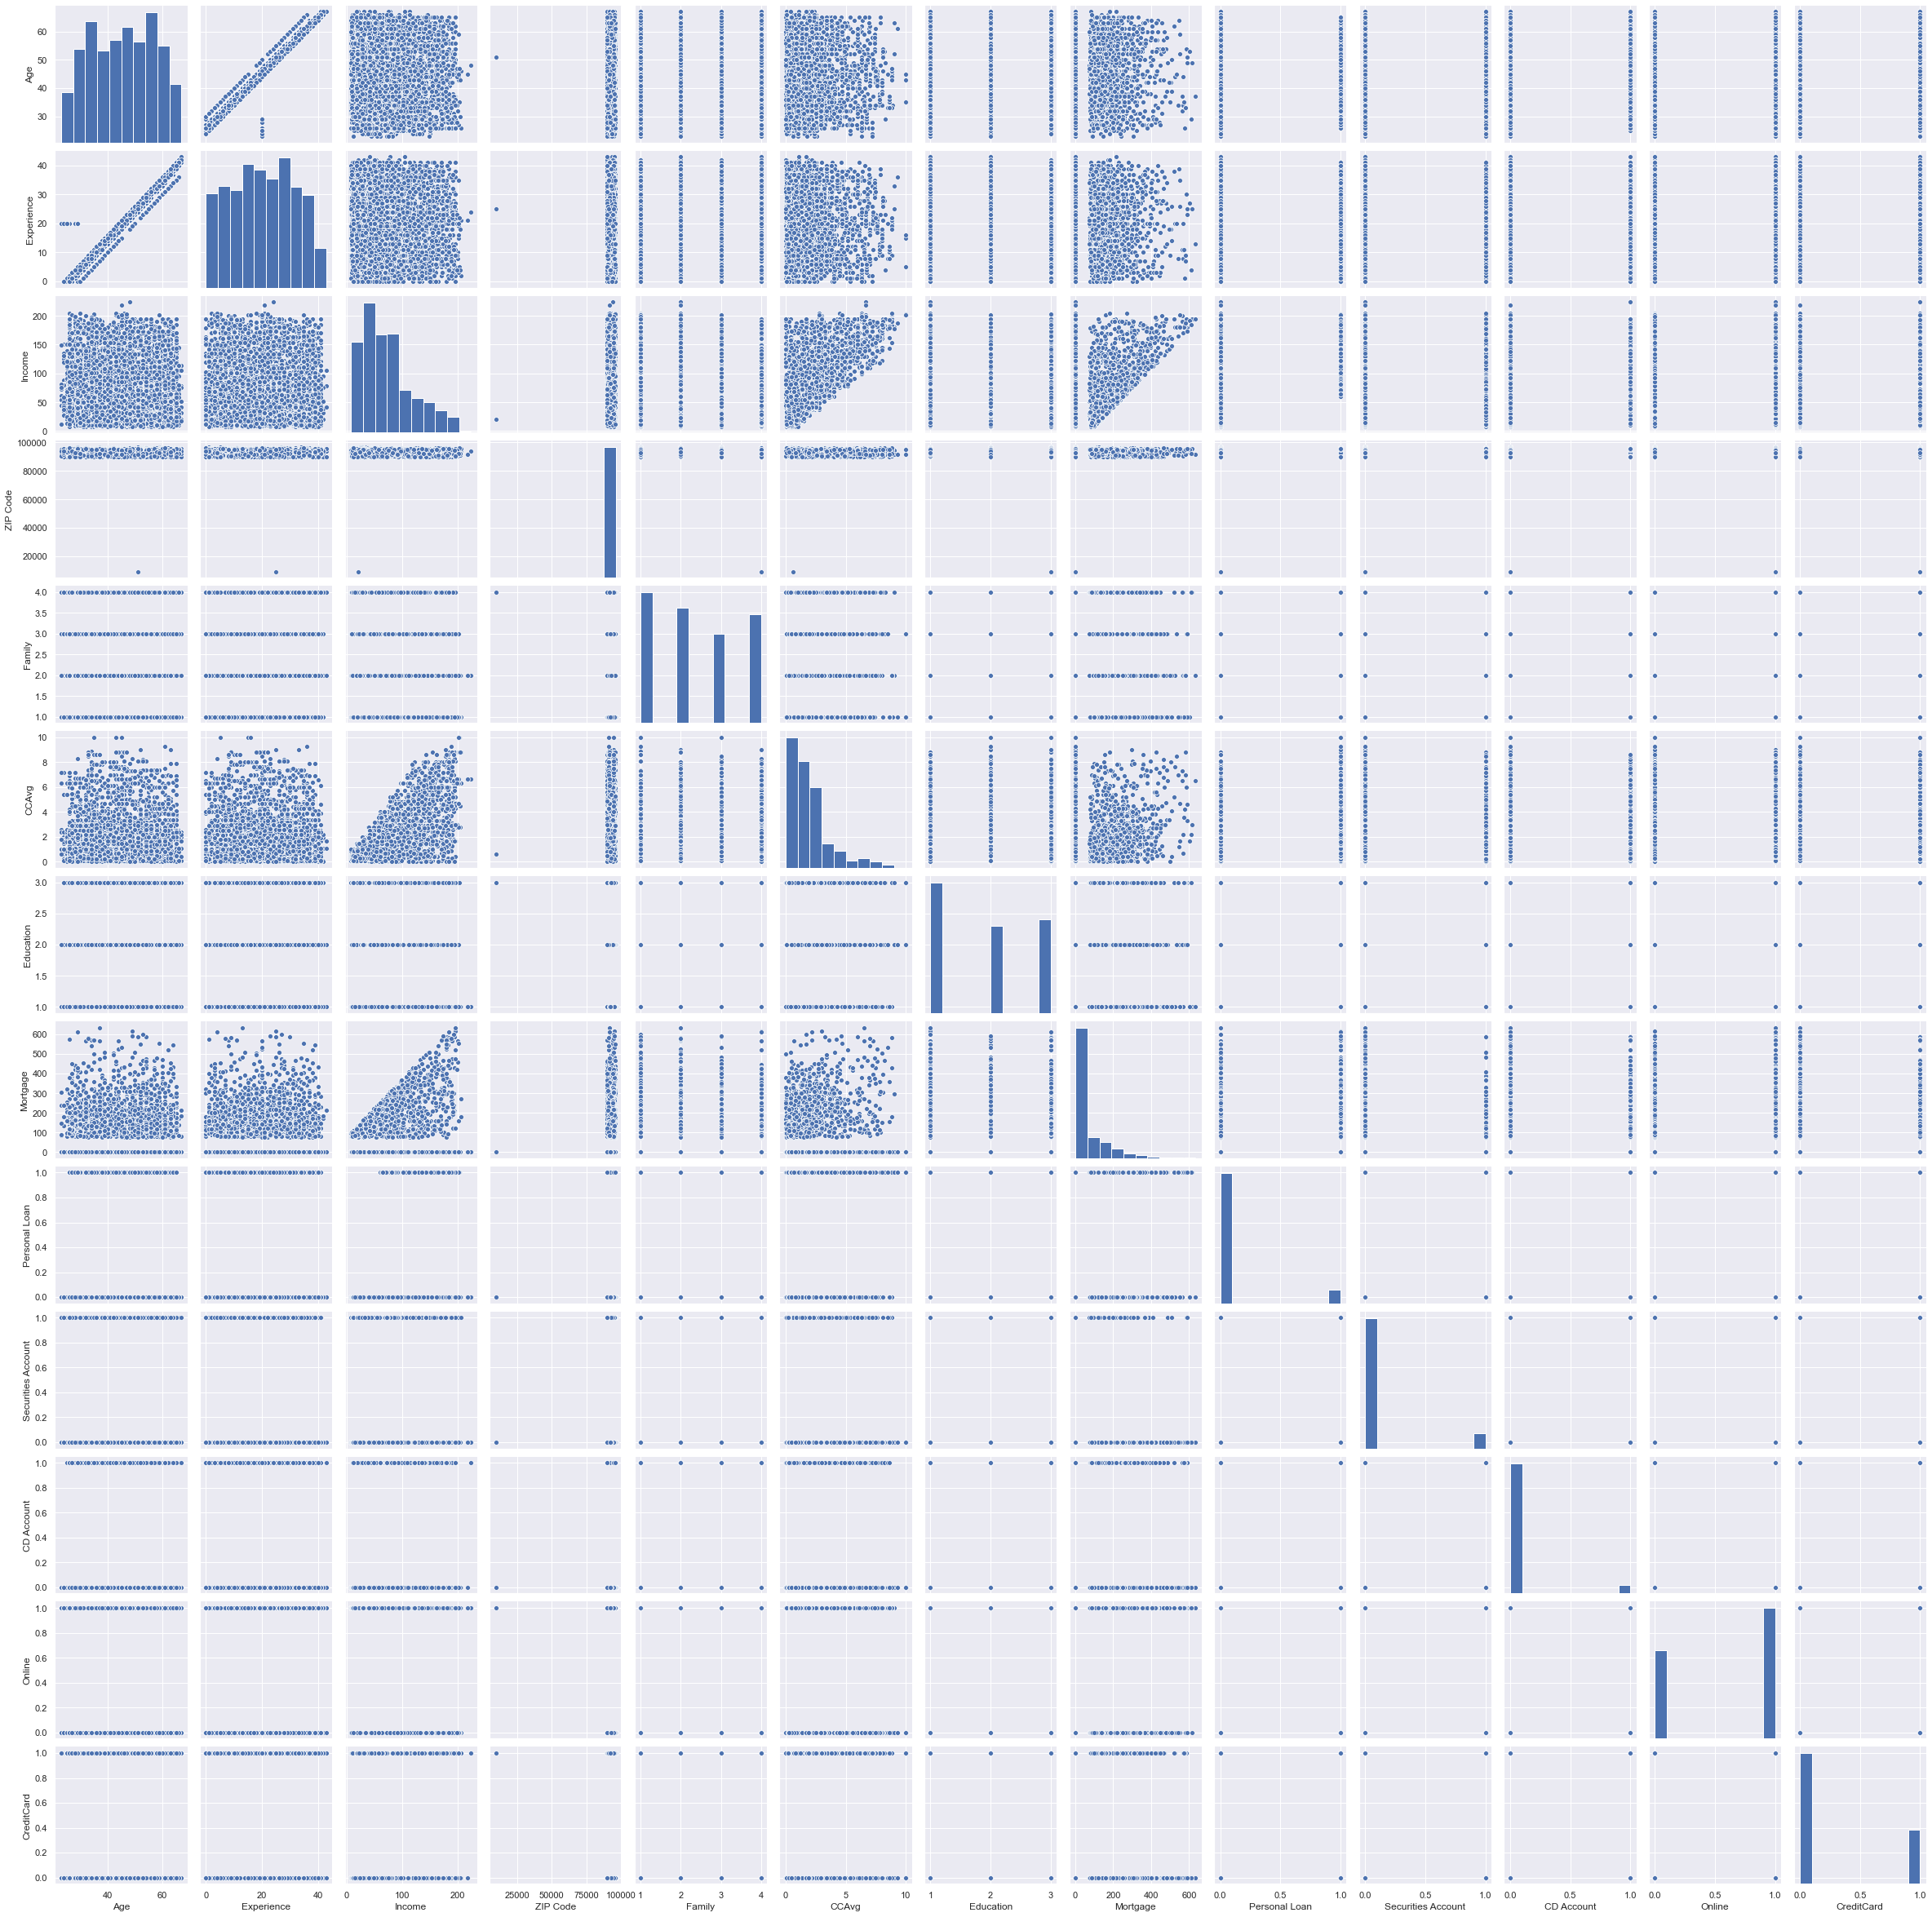

In [73]:
#Pairplot

sns.pairplot(df.iloc[:,1:])

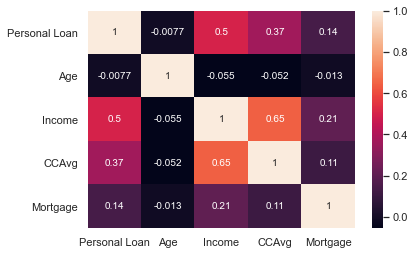

In [18]:
sns.heatmap(df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

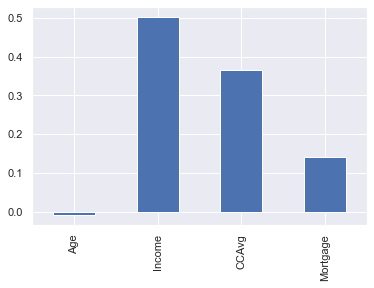

In [19]:
df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()


#OBSERVATION: Income and CCAvg have some correlation with the Personal Loan, Age has hardly any correlation.

In [20]:
#Q4). One hot encode the Education variable (3 points)

df_dummies= pd.get_dummies(df, prefix='Edu', columns=['Education']) #This function does One-Hot-Encoding on categorical text

In [21]:
# returns the names of all the columns as a list

df_dummies.head()


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
0   1   25         1.0      49     91107       4    1.6         0   
1   2   45        19.0      34     90089       3    1.5         0   
2   3   39        15.0      11     94720       1    1.0         0   
3   4   35         9.0     100     94112       1    2.7         0   
4   5   35         8.0      45     91330       4    1.0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  Edu_1  \
0              0                   1           0       0           0      1   
1              0                   1           0       0           0      1   
2              0                   0           0       0           0      1   
3              0                   0           0       0           0      0   
4              0                   0           0       0           1      0   

   Edu_2  Edu_3  
0      0      0  
1      0      0  
2      0      0  
3      1      0  
4      1      0

In [22]:
df_dummies.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Edu_1', 'Edu_2', 'Edu_3'],
      dtype='object')

In [24]:
#Q5). Separate the data into dependant and independent variables and create training and test sets out of them
#(X_train, y_train, X_test, y_test) (2 points)


#Dependant variable analysis

df["Personal Loan"].value_counts().to_frame()

Personal Loan
0           4520
1            480

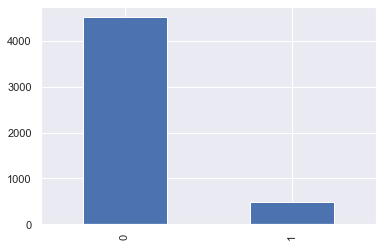

In [25]:
pd.value_counts(df["Personal Loan"]).plot(kind="bar")

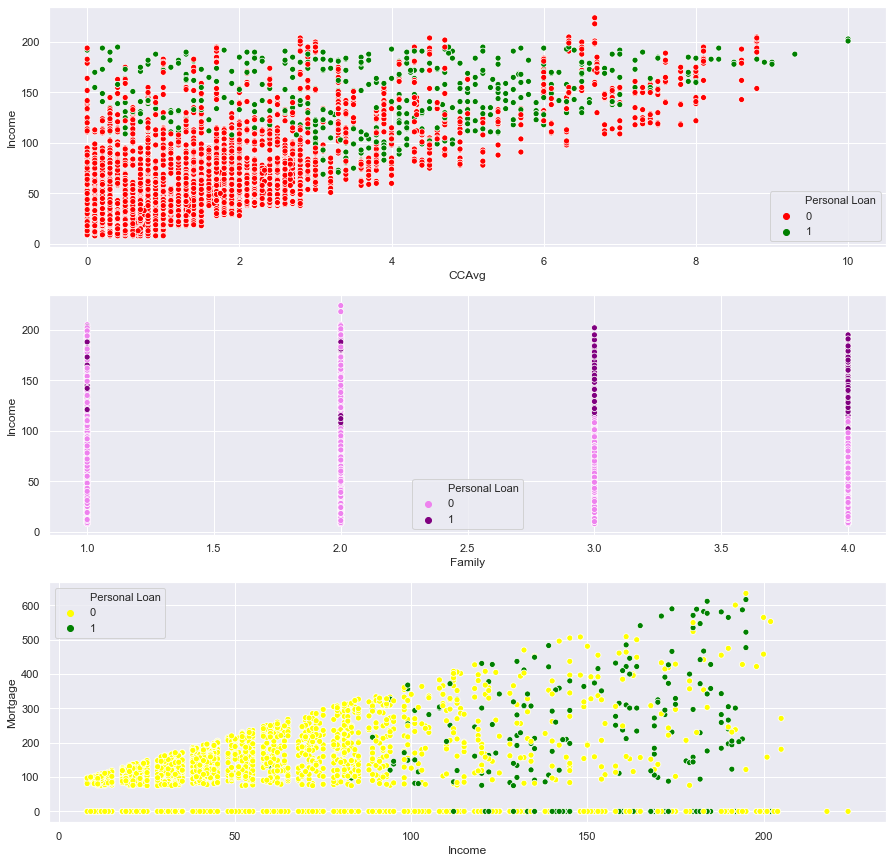

In [26]:
#Influence of few attributes on 'Personal Loan' - Dependant Variable
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.CCAvg, df.Income, hue = df['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(df.Family, df.Income, hue = df['Personal Loan'], palette= ['violet','purple'])

plt.subplot(3,1,3)
sns.scatterplot(df.Income, df.Mortgage, hue = df['Personal Loan'], palette= ['yellow','green'])

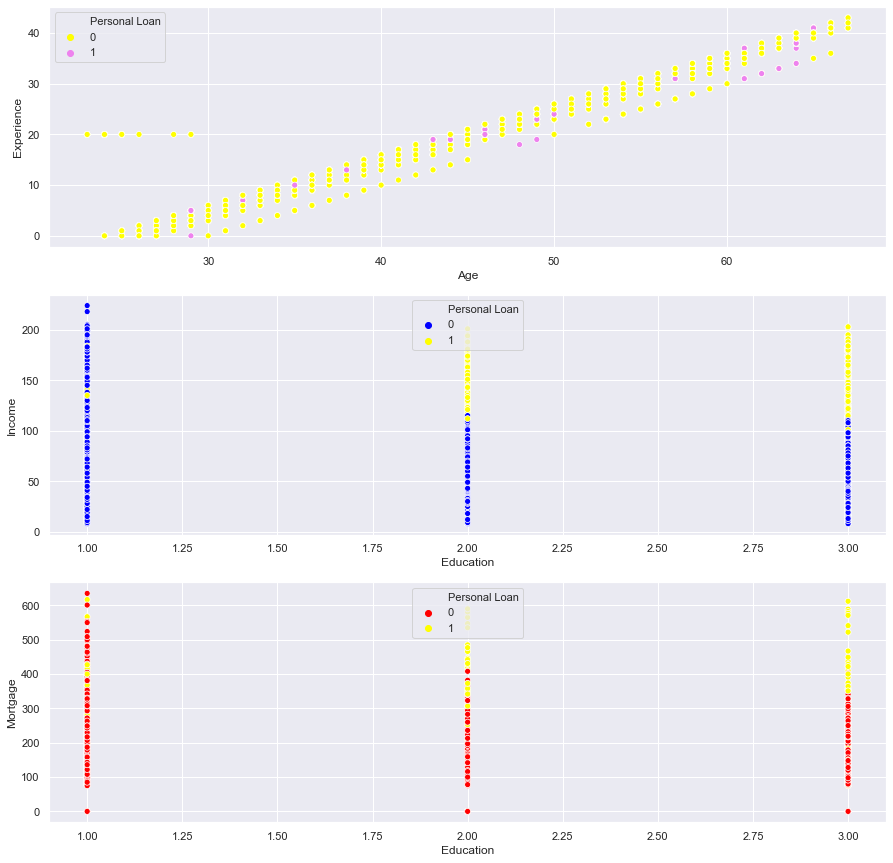

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(df.Age, df.Experience, hue = df['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(df.Education, df.Income, hue = df['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(df.Education, df.Mortgage, hue = df['Personal Loan'], palette= ['red','yellow'])

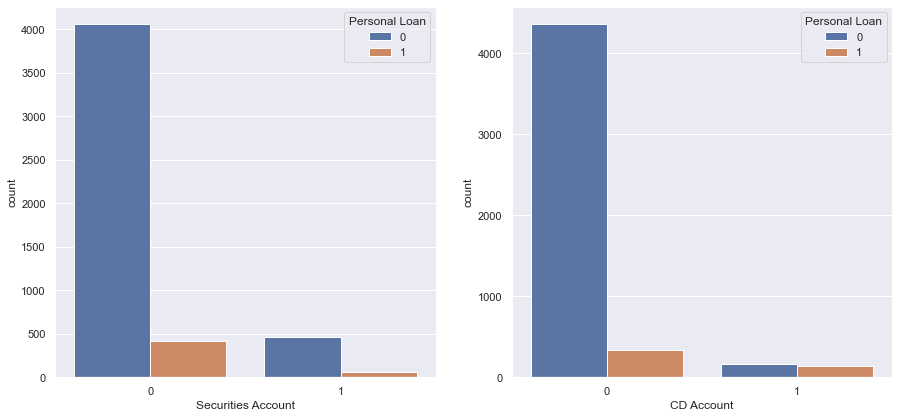

In [28]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=df ,hue='Personal Loan')

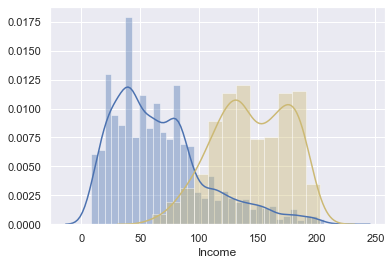

In [29]:
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'y')

In [30]:
#creating training and test sets

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [31]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [32]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [81]:
#Q6) Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the
#StandardScaler object to the train data and transform train and test da
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df))
StandardScaler()
print(scaler.mean_)

print(scaler.transform(df))


StandardScaler()
[2.5005000e+03 4.5338400e+01 2.0327600e+01 7.3774200e+01 9.3152503e+04
 2.3964000e+00 1.9379380e+00 1.8810000e+00 5.6498800e+01 9.6000000e-02
 1.0440000e-01 6.0400000e-02 5.9680000e-01 2.9400000e-01]
[[-1.73170443 -1.77441684 -1.71771726 ... -0.25354028 -1.21661774
  -0.64531434]
 [-1.73101161 -0.02952359 -0.11798886 ... -0.25354028 -1.21661774
  -0.64531434]
 [-1.73031879 -0.55299157 -0.47348406 ... -0.25354028 -1.21661774
  -0.64531434]
 ...
 [ 1.73031879  1.54088033  1.65948715 ... -0.25354028 -1.21661774
  -0.64531434]
 [ 1.73101161  1.71536965  1.74836095 ... -0.25354028  0.82195086
  -0.64531434]
 [ 1.73170443 -1.51268285 -1.45109586 ... -0.25354028  0.82195086
   1.54963239]]


In [61]:
#Q7)Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy,
#recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set (5
#points)

confusion_matrix = confusion_matrix(Y_Test, predicted)
print(confusion_matrix)

[[1352   21]
 [ 112   14]]


In [63]:
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

    accuracy                           0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499



In [59]:
#Q8). Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7
#to train and get the metrics of the model (15 points)

#logistic regression


from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression()

In [40]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

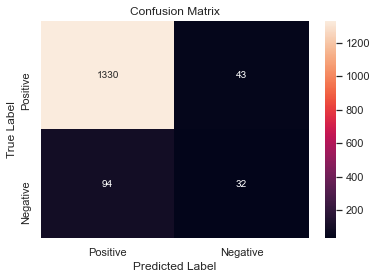

In [41]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [66]:
# Classification Report
LOG_reg=classification_report(Y_Test, predict)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.43      0.25      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.63      1499
weighted avg       0.89      0.91      0.90      1499



In [45]:
# KNN Model
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [46]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    
    # Predict the response
    Y_Pred = knn.predict(X_Test)
    
    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [47]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9112741827885257


Text(0, 0.5, 'Misclassification Error')

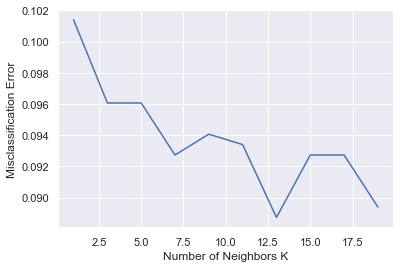

In [48]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

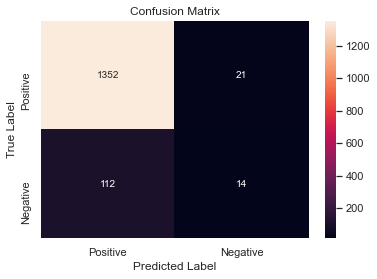

In [49]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
# Classification Report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

    accuracy                           0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499



In [51]:
# Naive Model
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

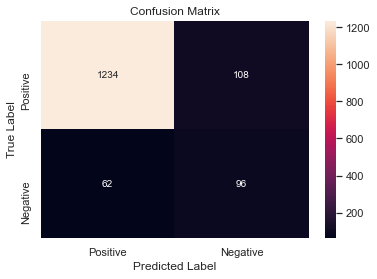

In [52]:
# Confusion Matrix
cm2 = confusion_matrix(test_labels, prediction)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
# Classififcation Report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



In [71]:
#Q9) Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”.
#Populate the dataframe accordingly (5 points)

LOG_reg=classification_report(Y_Test, predict)
print(classification_report(Y_Test, predict))

KNN=classification_report(Y_Test, predict)
print(classification_report(Y_Test, predicted))

Naive=classification_report(Y_Test, predict)
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1373
           1       0.43      0.25      0.32       126

    accuracy                           0.91      1499
   macro avg       0.68      0.61      0.63      1499
weighted avg       0.89      0.91      0.90      1499

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

    accuracy                           0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.47      0.61      0.53       158

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.90      0.89      0.89      1500



In [ ]:
#Q10)Give your reasoning on which is the best model in this case (5 points)

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Logistic Regression is the best Model as its accuracy is highest and recall is also good

#In KNN the accuracy and recall is good but the confusion matrix tells it is not the accurate model for prediction

#Naive Bayes has less accuracy and recall compared to other models